# Disease Symptom Prediction

Here will be using the 4 dataset and use it to predict symptom of disease using the information contained in this dataset.

In Data analysis we will use 7 algorithms 

1.Linear Regression

2.Ridge Regression

3.K Neighbors Classifier

4.Lasso Regression

5.Random Forest Classifier

6.Decision Tree Classifier

7.XGBoost Classifier

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

### Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Preparation

Step 3: Data Visualization

Step 4:Data training

Step 5: Model Creation

Step 6: Performance Evaluation

## **Data Exploration**

In [171]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np #for large and multi-dimensional arrays
import pandas as pd #for data manipulation and analysis
import nltk 

In [172]:
## reading dataset
df = pd.read_csv('../Dataset/dataset.csv')

print(df.shape)
df.head()

(4920, 18)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
# reading the description dataset
description = pd.read_csv('../Dataset/symptom_Description.csv')
print(description.shape)
description.head()

(41, 2)


,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [174]:
# reading the precaution dataset
precaution = pd.read_csv('../Dataset/symptom_precaution.csv')
print(precaution.shape)
precaution.head()

(41, 5)


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [175]:
# reading the severity dataset
severity = pd.read_csv('../Dataset/Symptom-severity.csv')
print(severity.shape)
severity.head()

(133, 2)


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [176]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [177]:
description.columns

Index(['Disease', 'Description'], dtype='object')

In [178]:
precaution.columns

Index(['Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4'],
      dtype='object')

In [179]:
severity.columns

Index(['Symptom', 'weight'], dtype='object')

## **Data Preparation**

In [180]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [181]:
len(df['Disease'].unique())

41

In [182]:
df['Disease']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: Disease, Length: 4920, dtype: object

In [183]:
# get a list like this --> ['Symptom_1', Symptom_2, ..., Symptom_17 ]
cols = [i for i in df.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [184]:
tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1
...,...,...,...,...
83635,4915,Symptom_17,NaN,1
83636,4916,Symptom_17,NaN,1
83637,4917,Symptom_17,NaN,1
83638,4918,Symptom_17,NaN,1


In [185]:
diseases = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')

# Add labels column
diseases.insert(0,'label',df['Disease'])

# Fill NaN with zero
diseases = diseases.fillna(0)
diseases

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,Acne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4917,Urinary tract infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Data Visualization**

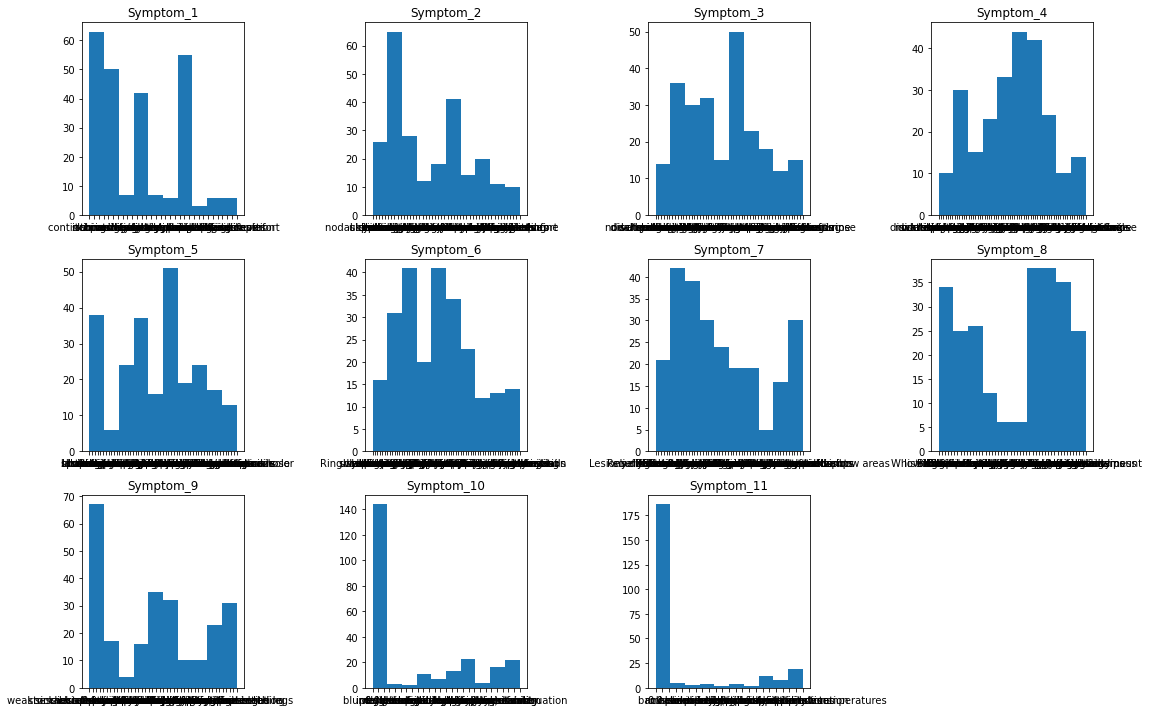

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

to_hist = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']

plt.figure(figsize=(16,10))
for idx, col in enumerate(to_hist):
    plt.subplot(3, 4, idx+1)
    plt.hist(df1[col])
    plt.title(col)
plt.tight_layout();

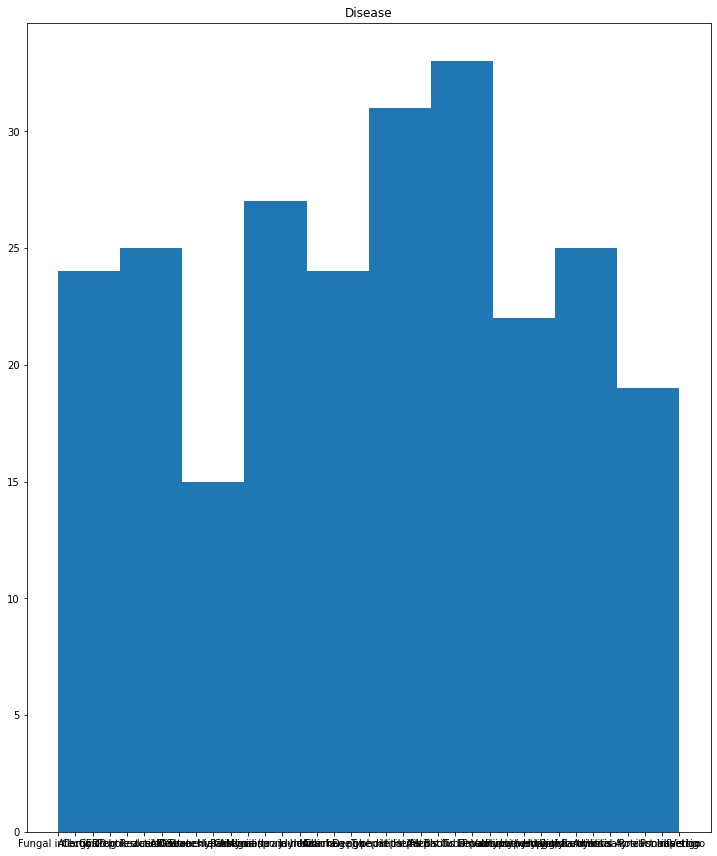

In [187]:
to_hist = ['Disease']

plt.figure(figsize=(40,35))
for idx, col in enumerate(to_hist):
    plt.subplot(3, 4, idx+1)
    plt.hist(df1[col])
    plt.title(col)
plt.tight_layout();

In [188]:
df_temp=df1.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]

In [189]:
df_temp.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,itching,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,skin rash,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0
3,Fungal infection,itching,skin rash,dischromic patches,nodal skin eruptions,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0
4,Fungal infection,skin rash,itching,dischromic patches,nodal skin eruptions,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0


In [190]:
from sklearn.preprocessing import LabelEncoder
labencoder=LabelEncoder()
df_temp.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]=\
df_temp.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']].apply(labencoder.fit_transform)

In [191]:
df_temp.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,13,13,35,34,15,0,1,2,0,0,0,0
1,13,23,27,17,27,0,1,2,0,0,0,0
2,13,13,27,16,49,0,1,2,0,0,0,0
3,13,13,35,16,36,0,1,2,0,0,0,0
4,13,23,19,16,36,0,1,2,0,0,0,0


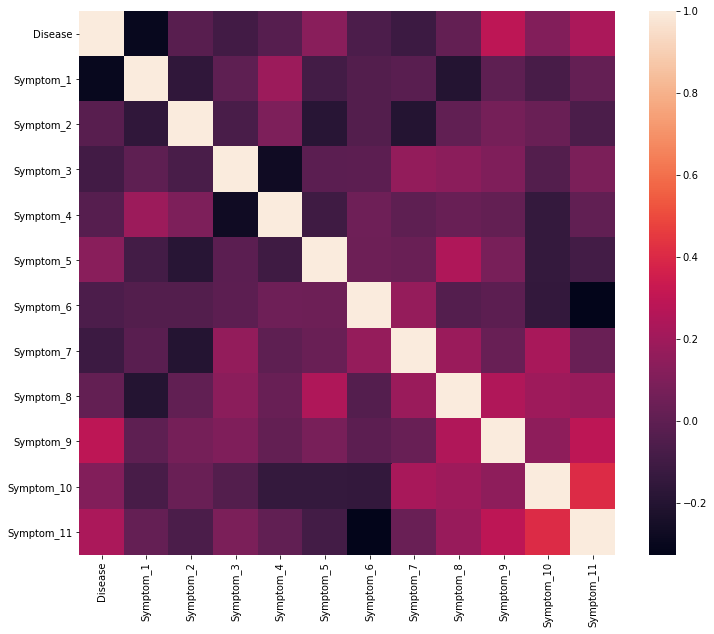

In [192]:
plt.figure(figsize=(12,10))
sns.heatmap(df_temp.corr());

## **Data Training**

In [193]:
df_temp

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,13,13,35,34,15,0,1,2,0,0,0,0
1,13,23,27,17,27,0,1,2,0,0,0,0
2,13,13,27,16,49,0,1,2,0,0,0,0
3,13,13,35,16,36,0,1,2,0,0,0,0
4,13,23,19,16,36,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
240,23,23,17,4,43,52,40,41,36,32,0,0
241,23,11,5,37,62,39,40,41,36,32,0,0
242,23,23,5,37,62,18,40,41,36,32,0,0
243,23,23,17,37,62,4,40,41,36,32,0,0


In [194]:
df_temp['Disease']

0      13
1      13
2      13
3      13
4      13
       ..
240    23
241    23
242    23
243    23
244    23
Name: Disease, Length: 245, dtype: int32

In [195]:
df_temp['Symptom_1']

0      13
1      23
2      13
3      13
4      23
       ..
240    23
241    11
242    23
243    23
244    23
Name: Symptom_1, Length: 245, dtype: int32

In [196]:
y=df_temp['Disease']
X=df_temp.drop(['Disease'],axis=1)

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# **Model Creation**

### **Linear Regression**

In [198]:
# Linear Regression

from sklearn.linear_model import LinearRegression
model2=LinearRegression() # created a 

In [199]:
model2.fit(X_train, y_train)
# Making predictions 
pred2 = model2.predict(X_test)
pred2

array([14.33803109, 12.20007388, 26.0112689 , 22.32360962, 21.76800369,
       25.2163331 , 21.71451882, 22.52398821, 18.85612051, 28.12421591,
       18.92918862, 22.81418833, 22.42814546, 19.02332939, 20.53654903,
       16.27782817, 21.65454742, 23.87909383, 23.75736332, 17.78417269,
       17.80312809, 18.87119749, 20.67277164, 27.71679724, 29.55689276,
       22.55366619, 24.1068015 ,  5.8553802 , 11.37144132, 22.974759  ,
       18.9615217 , 30.12995901, 12.10632911, 10.29144959, 15.34163477,
       20.51831194,  7.60105346, 22.52265621, 11.91636655, 21.68680964,
       14.12952711, 11.72613309, 12.02611051, 19.87972769, 17.24709284,
       16.10536394, 15.99384464,  6.45199282, 24.05605091])

In [200]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(model2.score(X_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.2564782012273643


### **Ridge Regression**

In [201]:
# Importing model
from sklearn.linear_model import Ridge
model3 = Ridge()

In [202]:
#Fitting data into the model.
model3.fit(X_train, y_train)
# Making predictions on Test data 
pred3 = model3.predict(X_test)
pred3

array([14.33855798, 12.20038756, 26.01084693, 22.32337914, 21.76749587,
       25.21601324, 21.71414557, 22.523553  , 18.85650679, 28.12373812,
       18.92884219, 22.81376727, 22.42835156, 19.02317712, 20.53609531,
       16.2780614 , 21.65404851, 23.87884795, 23.75719276, 17.78461023,
       17.80296004, 18.87131242, 20.67257575, 27.71602954, 29.55619031,
       22.55315514, 24.10662462,  5.85603851, 11.37212925, 22.97451482,
       18.96166148, 30.12919221, 12.10679571, 10.29144538, 15.34221435,
       20.51827034,  7.60188405, 22.52251343, 11.91658539, 21.68628344,
       14.13029152, 11.72654889, 12.02622221, 19.87963084, 17.24696313,
       16.10527233, 15.99428617,  6.45246989, 24.05531801])

In [203]:
print("Accuracy of the RidgeRegression model comes to be: \n ") 
print(model3.score(X_train,y_train))

Accuracy of the RidgeRegression model comes to be: 
 
0.2564781997750426


### **K Neighbors Classifier**

In [204]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=30)

In [205]:
#Fitting data into the model.
model4.fit(X_train, y_train)
# Making predictions on Test data 
pred4 = model4.predict(X_test)
pred4

array([ 5, 27, 11, 13,  5, 33,  8, 20,  8,  8, 20, 33, 20, 26, 20, 20,  5,
       30,  8,  8, 20, 11, 13, 33, 33, 30, 36,  0, 27, 25, 11, 33, 13,  9,
       11, 27, 30, 27, 27,  5,  8,  5,  5, 29,  8, 17,  8,  9, 20])

In [206]:
print("Accuracy of the K Neighbors Classifier model comes to be: \n ") 
print(model4.score(X_train,y_train))

Accuracy of the K Neighbors Classifier model comes to be: 
 
0.39285714285714285


### **Lasso Regression**

In [207]:
# Importing model
from sklearn.linear_model import Lasso
model5 = Lasso()

In [208]:
#Fitting data into the model.
model5.fit(X_train, y_train)
# Making predictions on Test data 
pred5 = model5.predict(X_test)
pred5

array([14.57136159, 12.56046307, 25.91161436, 21.95777727, 21.206432  ,
       25.09027478, 21.5682065 , 22.21778686, 18.88920439, 27.96601459,
       19.10791315, 22.10647763, 22.75512238, 19.0111333 , 20.30911984,
       16.76067571, 21.10748082, 23.15862268, 23.93050584, 17.94133119,
       17.86354573, 19.05625725, 20.26703618, 27.37922131, 29.05102986,
       22.1222818 , 23.83650632,  6.60161358, 11.71587525, 22.94951115,
       19.11903684, 29.56729651, 12.33511361, 10.6526838 , 15.85211371,
       20.45407611,  7.93813254, 22.6261513 , 12.15021783, 21.15654249,
       14.90552908, 12.18200072, 12.08265282, 19.75879381, 17.54085483,
       16.26613698, 16.04726629,  7.07363807, 23.85851822])

In [209]:
print("Accuracy of the Lasso Regression model comes to be: \n ") 
print(model5.score(X_train,y_train))

Accuracy of the Lasso Regression model comes to be: 
 
0.2555446756706905


### **Random Forest Classifier**

In [210]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()

In [211]:
model6.fit(X_train,y_train)
pred6=model6.predict(X_test)
pred6

array([31, 31, 26,  6, 35, 22, 16, 16,  8, 26, 20, 33, 24, 34, 20, 18, 35,
       30,  7,  8, 10, 11, 19, 22, 36, 35, 36,  4,  0, 25, 11, 36, 13,  9,
       14,  1,  3, 24,  2, 35,  7, 31,  5, 22, 26, 17, 20,  9, 10])

In [212]:
print("Accuracy of the RandomForest model comes to be: \n ") 
print(accuracy_score(y_test,pred6))

Accuracy of the RandomForest model comes to be: 
 
0.9183673469387755


### **Decision Tree Regression**

In [213]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
model7 = DecisionTreeRegressor()

In [214]:
#Fitting data into the model.
model7.fit(X_train, y_train)
# Making predictions on Test data 
pred7 = model7.predict(X_test)
pred7

array([28., 31., 26.,  6., 35., 22., 16., 16., 10., 26., 20., 28., 24.,
       34., 20., 18., 35., 30.,  7.,  8., 10., 11., 19., 22., 36.,  1.,
       36.,  4.,  0., 25., 11., 36., 13.,  9., 14.,  1.,  3., 24.,  2.,
       35., 27., 28.,  5., 22., 26., 17.,  8.,  9., 32.])

In [215]:
print("Accuracy of the DecisionTree Classifier model comes to be: \n ") 
print(accuracy_score(y_test,pred7))

Accuracy of the DecisionTree Classifier model comes to be: 
 
0.8163265306122449


### **XG Boost Classifier**

In [216]:
from xgboost import XGBRegressor,XGBClassifier
model8 = XGBClassifier()

In [217]:
#Fitting data into the model.
model8.fit(X_train, y_train)
# Making predictions on Test data 
pred8 = model8.predict(X_test)
pred8

[11:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([25, 31,  7,  6, 35, 22, 16, 16,  8,  7, 20, 32, 24, 34, 20, 18, 35,
       30,  7,  8, 10, 11, 19, 22, 36, 35, 36,  4,  0, 25, 11, 36, 13,  9,
       14,  1,  3, 36,  2, 35,  7, 31,  5, 22, 26, 17, 36,  9, 10])

In [218]:
print("Accuracy of the XG Boost model comes to be: \n ") 
print(accuracy_score(y_test,pred8))

Accuracy of the XG Boost model comes to be: 
 
0.8979591836734694


# **Performance Evaluation**

In [219]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), model2.score(X_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), model3.score(X_train,y_train)))
print("""K Neighbors Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), model4.score(X_train,y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred5)), model5.score(X_train,y_train)))
print("""Random Forest Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred6)), accuracy_score(y_test,pred6)))
print("""Decision Tree Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred7)), accuracy_score(y_test,pred7)))
print("""XG Boost Classifier\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred8)), accuracy_score(y_test,pred8)))

Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 9.4119 	 		 0.2565
Ridge Regression 		 9.4120 	 		 0.2565
K Neighbors Classifier 		 13.0368 	 		 0.3929
Lasso Regression 		 9.4964 	 		 0.2555
Random Forest Classifier 		 1.9219 	 		 0.9184
Decision Tree Classifier 		 6.6486 	 		 0.8163
XG Boost Classifier		 5.9556 	 		 0.8980


Conclusion: Accuracy of Regression models- Linear regression, rigde regression, Lasso Regression is almost same around 25%.

Accuracy of K Neighbors Classifier is 39.29%.

Whereas accuracy of Random Forest Classifier , Decision Tree Classifier and  XG Boost Classifierr is significant.

And the Accuracy of the Random Forest Classifier is more, so it is efficient among all.